In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
file_path = '/Users/jonaheaton/Desktop/AE Models April 08-2.csv'

In [4]:
df = pd.read_csv(file_path,index_col=0)

In [5]:

df['IMDC Val finetune Diff'] = df['IMDC AUC finetune Val (v1)'] - df['IMDC AUC randinit Val (v1)']
df['MSKCC Val finetune Diff'] = df['MSKCC AUC finetune Val (v1)'] - df['MSKCC AUC randinit Val (v1)']

In [8]:
df.head()

,# layers,latent sz,Owner,Creation Time,Tags,pretrain/kwargs/encoder_kind,val StudyID AUROC,val isPediatric AUROC,val recon loss,val Cohort Label AUROC,...,(pretrain) early stopping patience,(pretrain) dropout rate,IMDC AUC finetune Train (v1),IMDC AUC finetune Val (v1),IMDC AUC randinit Train (v1),IMDC AUC randinit Val (v1),IMDC N Trials (v1),IMDC AUC finetune Val Std (v1),IMDC AUC randinit Val Std (v1),IMDC Val finetune Diff
Id,,,,,,,,,,,,,,,,,,,,,
RCC-1866,10.0,12.0,jeaton-revivemed,2024-04-06 03:48:40,"[""v3.2""]",AE,0.644006,0.542598,0.948132,0.576204,...,50.0,0.5,0.793748,0.761422,0.982861,0.888811,10.0,0.051675,0.007593,-0.127389
RCC-1839,10.0,44.0,jeaton-revivemed,2024-04-05 14:30:09,"[""v3.2""]",AE,NaN,NaN,NaN,NaN,...,0.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RCC-1751,10.0,8.0,jeaton-revivemed,2024-04-04 06:45:47,"[""april04_top200"",""v3.1"",""v3.2""]",AE,0.814082,0.983618,0.806416,0.961489,...,20.0,0.4,0.974621,0.863054,0.971200,0.872145,10.0,0.019965,0.027512,-0.009091
RCC-1948,10.0,30.0,jeaton-revivemed,2024-04-07 22:36:20,"[""v3.2""]",AE,0.731862,0.836195,0.948133,0.740464,...,20.0,0.1,0.988608,0.905711,0.915647,0.863636,10.0,0.012295,0.081268,0.042075
RCC-1640,10.0,8.0,jeaton-revivemed,2024-04-03 19:53:34,"[""april04_top200"",""v3.1"",""v3.2""]",AE,0.793581,0.982424,0.809770,0.938365,...,20.0,0.4,0.980940,0.868881,0.949966,0.873252,10.0,0.015482,0.027120,-0.004371


In [9]:
import statsmodels.api as sm

def get_linear_reg(col1,col2):
    # Extract the values of col1 and col2
    x = df[col1].values
    y = df[col2].values

    # drop nans
    nan_indx = np.isnan(x) | np.isnan(y)
    x = x[~nan_indx]
    y = y[~nan_indx]



    # Add a constant term to the independent variable
    x = sm.add_constant(x)

    # Fit the linear regression model
    model = sm.OLS(y, x).fit()

    # Get the coefficient and R-squared
    coef = model.params[1]
    r_squared = model.rsquared

    return coef, r_squared

<Axes: xlabel='latent sz', ylabel='Count'>

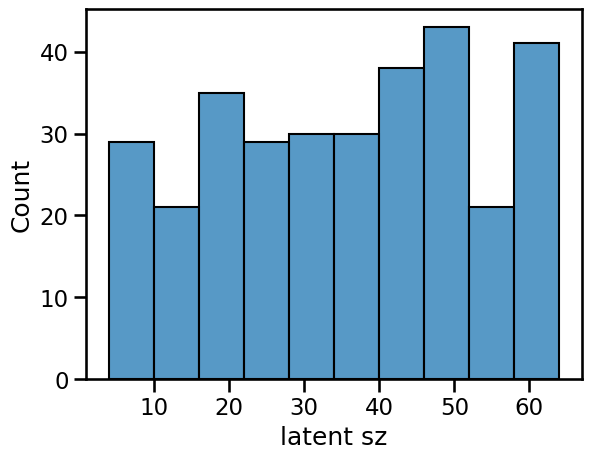

In [10]:
sns.set_context('talk')
sns.histplot(df,x='latent sz')

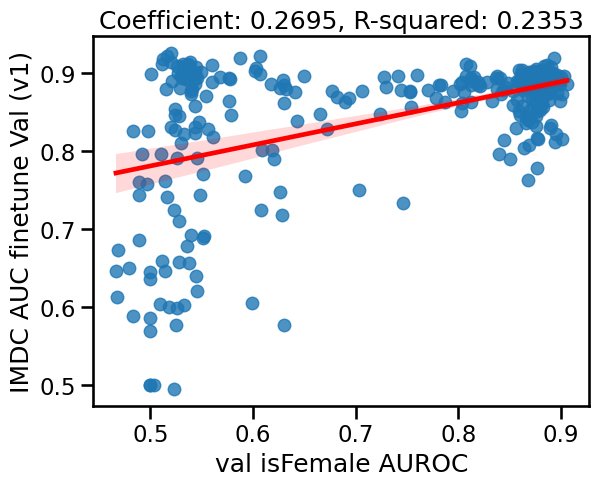

In [11]:
# sns.regplot(data=df,x='latent sz',y='val isFemale AUROC',line_kws={'color':'red'})
import matplotlib.pyplot as plt

# x_col = '# layers'
x_col = '(pretrain) num epochs'
# x_col = 'latent sz'
# y_col = 'val Age MAE'
# y_col = 'val isFemale AUROC'
x_col = 'val isFemale AUROC'
y_col = 'IMDC Val finetune Diff'

# x_col = 'val isPediatric AUROC'
# x_col = 'val StudyID AUROC'
y_col = 'IMDC AUC finetune Val (v1)'

sns.regplot(data=df, x=x_col, y=y_col, line_kws={'color':'red'})

# Get the coefficient and R-squared
coef, r_squared = get_linear_reg(x_col, y_col)

# Add the coefficient and R-squared to the plot
# plt.annotate(f'Coefficient: {coef:.2f}', xy=(0.05, 0.9), xycoords='axes fraction')
# plt.annotate(f'R-squared: {r_squared:.2f}', xy=(0.05, 0.85), xycoords='axes fraction')

# show the Coef and Rquared in the title
plt.title(f'Coefficient: {coef:.4f}, R-squared: {r_squared:.4f}')


plt.show()


## UMAP of ages

In [12]:
metadata_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/April_05_Data/metadata.csv'

metadata = pd.read_csv(metadata_file, index_col=0)

In [46]:
val_embed_file = '/Users/jonaheaton/Desktop/Z_embed_val.csv'
train_embed_file = '/Users/jonaheaton/Desktop/Z_embed_train.csv'

val_embed = pd.read_csv(val_embed_file, index_col=0)
train_embed = pd.read_csv(train_embed_file, index_col=0)

/var/folders/zk/pr84pr3n16z3yzz_rrstxmmc0000gn/T/ipykernel_58640/2902544500.py:5: DtypeWarning: Columns (70,71,72,74,76,77,78,82,83,84,85,89,95,104) have mixed types. Specify dtype option on import or set low_memory=False.
  train_embed = pd.read_csv(train_embed_file, index_col=0)


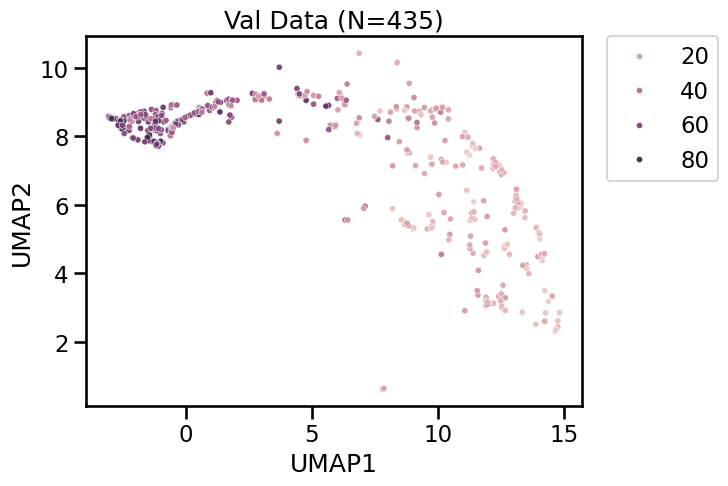

In [14]:
sz = 25/np.log((~metadata['Age'].isnull()).sum())
sns.scatterplot(data=val_embed,x='UMAP1',y='UMAP2',hue=metadata['Age'],s=sz)

num_data = (~val_embed['Age'].isna()).sum()
plt.title(f'Val Data (N={num_data})')
# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

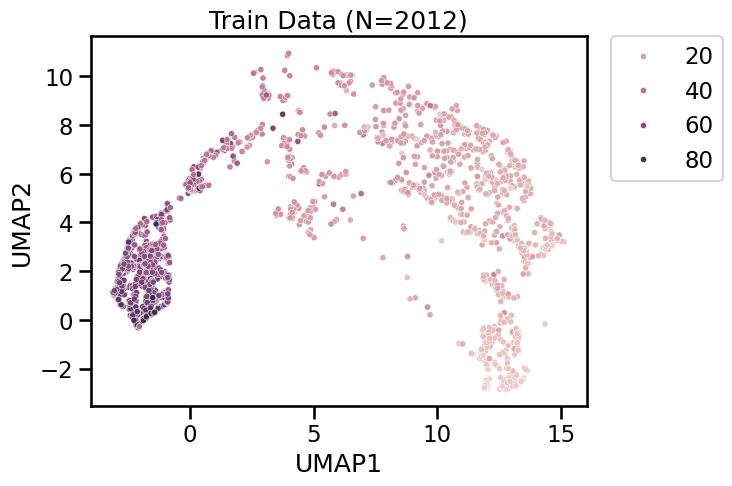

In [15]:
sns.scatterplot(data=train_embed,x='UMAP1',y='UMAP2',hue=metadata['Age'],s=20)

num_data = (~train_embed['Age'].isna()).sum()
plt.title(f'Train Data (N={num_data})')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Axes: xlabel='Sex', ylabel='Count'>

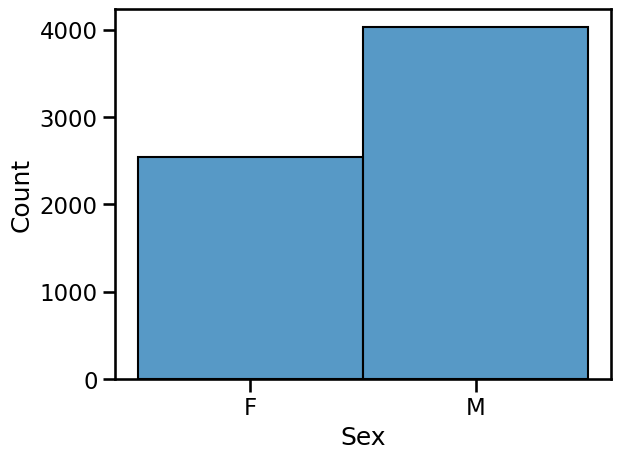

In [16]:
sns.histplot(metadata['Sex'])

In [17]:
(~metadata['Sex'].isna()).sum()

6570

In [31]:
metadata.groupby(['Pretrain'])['is Female'].mean()
# make a bar plot

Pretrain
Test     0.412371
Train    0.402299
Val      0.396770
Name: is Female, dtype: float64

<Axes: ylabel='is Female'>

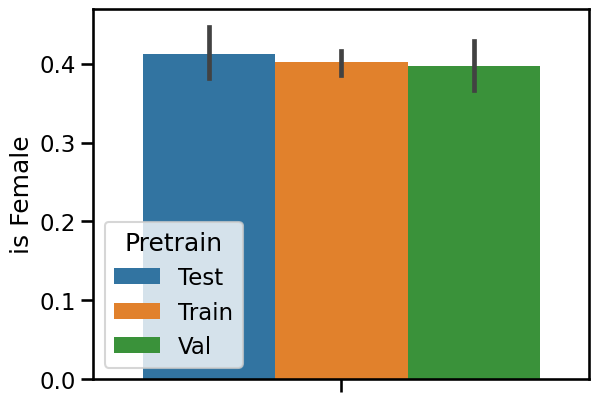

In [33]:
sns.barplot(y='is Female',hue='Pretrain',data=metadata)

In [18]:
has_age = metadata[~metadata['Sex'].isna()].copy()

In [19]:
has_age['Study ID'].value_counts()

Study ID
ST001422    1775
ST002331    1315
ST001237    1221
ST001849     691
ST001423     360
ST002112     335
ST001236     244
ST002251     210
ST001918     174
ST001519     150
ST000388      95
Name: count, dtype: int64

In [6]:
df.dropna(subset=['val recon loss'],inplace=True)

In [7]:
df['log val recon loss'] = np.log(df['val recon loss'])
# remove the old column
df.drop(columns=['val recon loss'],inplace=True)

df['neg log val recon loss'] = -df['log val recon loss']
df['neg val Age MAE'] = -df['val Age MAE']
df['neg val Age MSE'] = -df['val Age MSE']
df['neg val StudyID AUROC'] = -df['val StudyID AUROC']

# drop the old columns
df.drop(columns=['val Age MAE','val Age MSE','val StudyID AUROC','log val recon loss'],inplace=True)


In [18]:

df['model size'] = df['latent sz'] * df['# layers']

In [43]:
val_cols2 = ['latent sz','# layers','model size']
val_cols = [x for x in df.columns if 'AUROC' in x]
val_cols.append('neg log val recon loss')
pretrain_age_cols = [x for x in df.columns if 'val Age' in x]
val_cols.extend(pretrain_age_cols)

val_cols.append('IMDC AUC finetune Val (v1)')
val_cols.append('IMDC AUC randinit Val (v1)')
val_cols.append('IMDC Val finetune Diff')

val_cols.append('MSKCC AUC finetune Val (v1)')
val_cols.append('MSKCC AUC randinit Val (v1)')
val_cols.append('MSKCC Val finetune Diff')

val_cols = val_cols2 + val_cols


In [44]:
df[val_cols]

,latent sz,# layers,model size,val isPediatric AUROC,val Cohort Label AUROC,val isFemale AUROC,neg val StudyID AUROC,neg log val recon loss,neg val Age MAE,neg val Age MSE,IMDC AUC finetune Val (v1),IMDC AUC randinit Val (v1),IMDC Val finetune Diff,MSKCC AUC finetune Val (v1),MSKCC AUC randinit Val (v1),MSKCC Val finetune Diff
Id,,,,,,,,,,,,,,,,
RCC-1866,12.0,10.0,120.0,0.542598,0.576204,0.514335,-0.644006,0.053262,-18.652418,-542.153748,0.761422,0.888811,-0.127389,NaN,NaN,NaN
RCC-1751,8.0,10.0,80.0,0.983618,0.961489,0.690068,-0.814082,0.215155,NaN,NaN,0.863054,0.872145,-0.009091,0.824140,0.860847,-0.036706
RCC-1948,30.0,10.0,300.0,0.836195,0.740464,0.603039,-0.731862,0.053261,-10.484674,-198.586258,0.905711,0.863636,0.042075,NaN,NaN,NaN
RCC-1640,8.0,10.0,80.0,0.982424,0.938365,0.682273,-0.793581,0.211005,NaN,NaN,0.868881,0.873252,-0.004371,0.856746,0.864550,-0.007804
RCC-1763,8.0,10.0,80.0,0.984512,0.979151,0.744416,-0.877356,0.620200,NaN,NaN,0.877448,0.882984,-0.005536,0.832143,0.866138,-0.033995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RCC-1754,37.0,1.0,37.0,0.998128,0.997859,0.875887,-0.907741,0.556216,NaN,NaN,0.887529,0.890559,-0.003030,0.851587,0.869709,-0.018122
RCC-1624,50.0,1.0,50.0,0.998673,0.998446,0.894010,-0.913166,0.519803,NaN,NaN,0.892890,0.889394,0.003497,0.856349,0.867725,-0.011376
RCC-1714,32.0,1.0,32.0,0.999112,0.997543,0.882908,-0.894864,0.651422,NaN,NaN,0.901632,0.892075,0.009557,0.862500,0.871495,-0.008995


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0.5, 0, 'latent sz'),
  Text(1.5, 0, '# layers'),
  Text(2.5, 0, 'model size'),
  Text(3.5, 0, 'val isPediatric AUROC'),
  Text(4.5, 0, 'val Cohort Label AUROC'),
  Text(5.5, 0, 'val isFemale AUROC'),
  Text(6.5, 0, 'neg val StudyID AUROC'),
  Text(7.5, 0, 'neg log val recon loss'),
  Text(8.5, 0, 'neg val Age MAE'),
  Text(9.5, 0, 'neg val Age MSE'),
  Text(10.5, 0, 'IMDC AUC finetune Val (v1)'),
  Text(11.5, 0, 'IMDC AUC randinit Val (v1)'),
  Text(12.5, 0, 'IMDC Val finetune Diff'),
  Text(13.5, 0, 'MSKCC AUC finetune Val (v1)'),
  Text(14.5, 0, 'MSKCC AUC randinit Val (v1)'),
  Text(15.5, 0, 'MSKCC Val finetune Diff')])

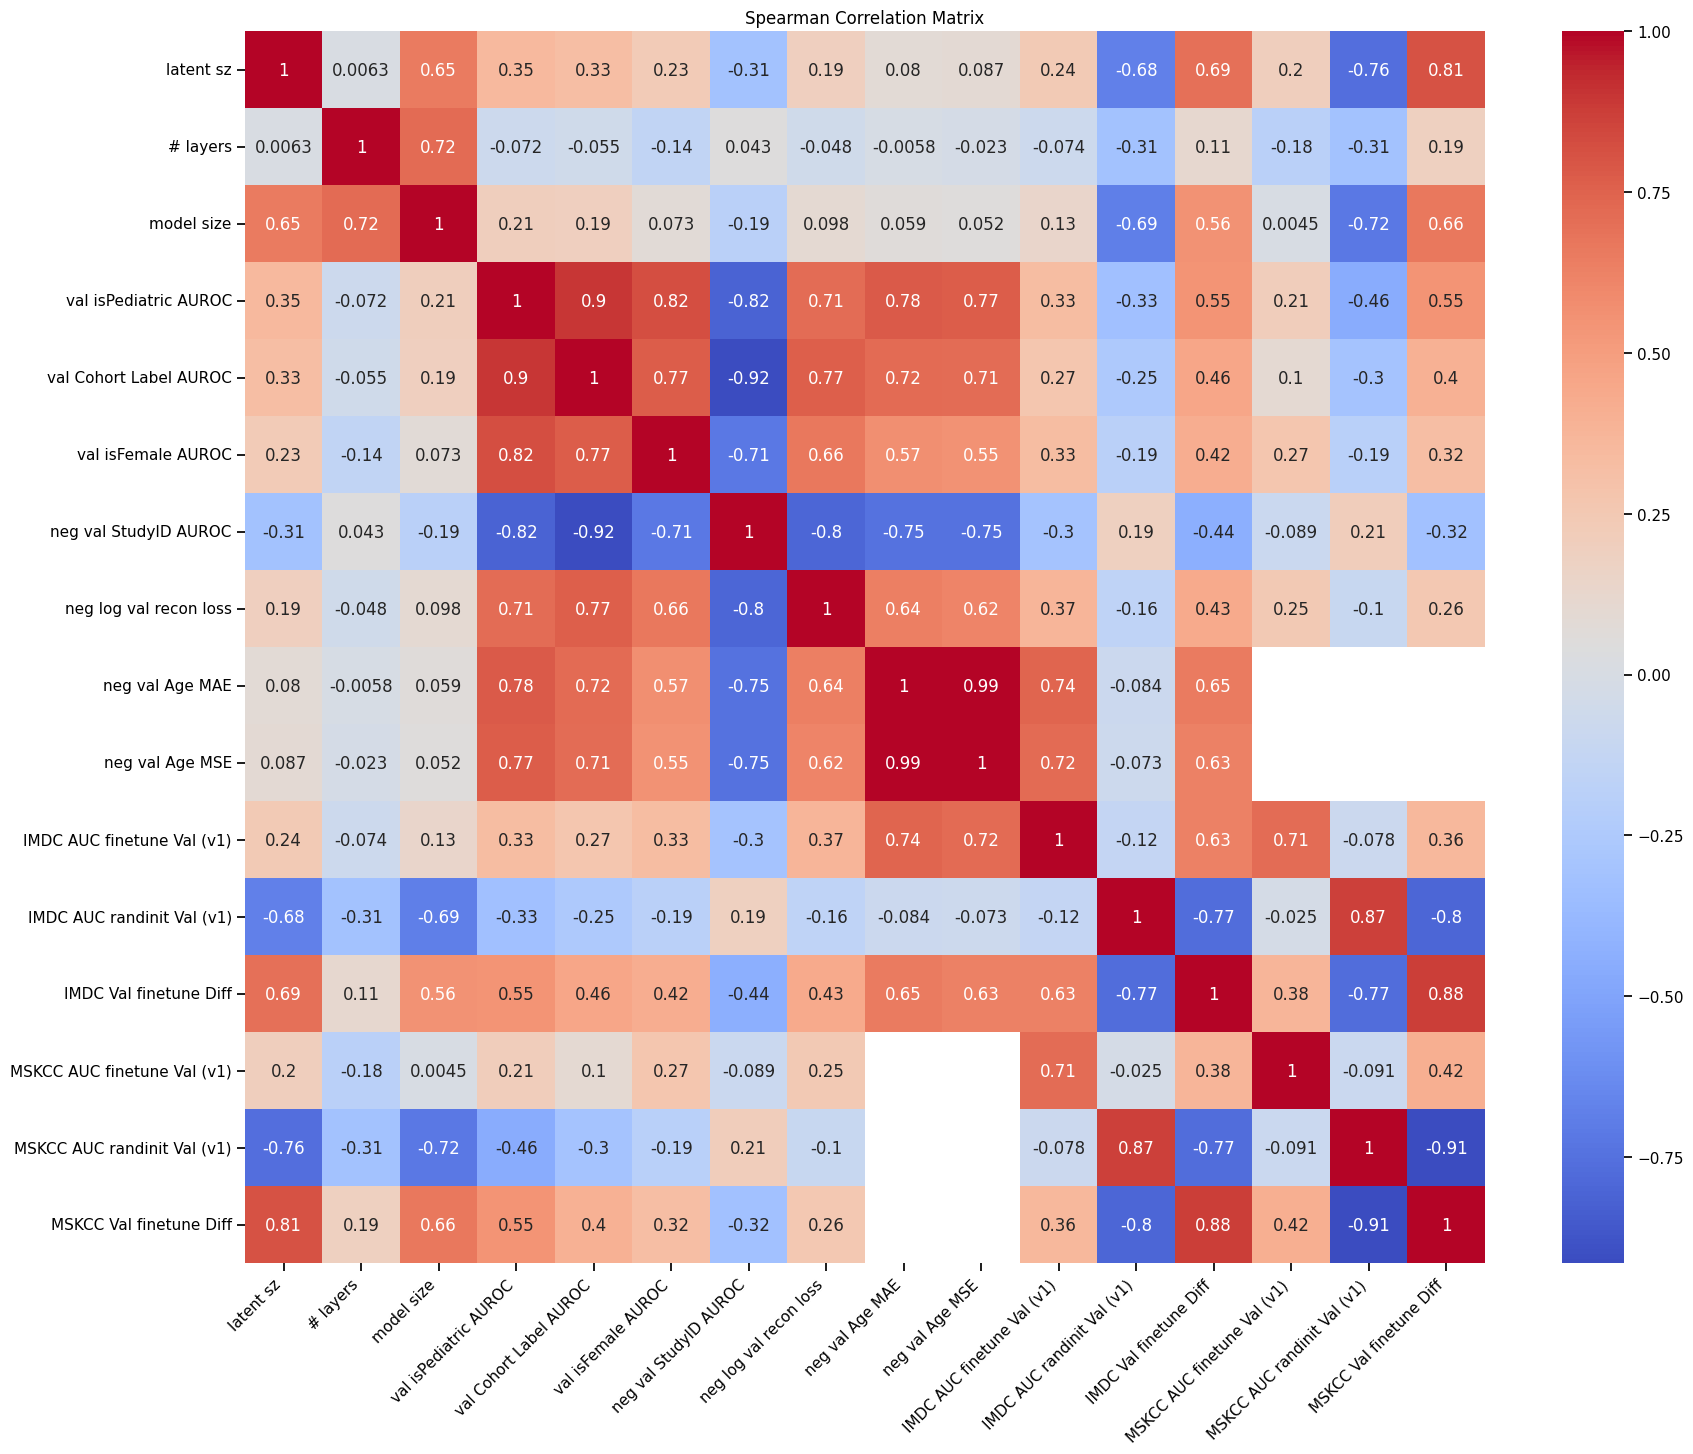

In [45]:
import seaborn as sns
sns.set_context('notebook')

# Compute the correlation matrix
corr_matrix = df[val_cols].corr(method='spearman')

# Plot the correlation matrix
# make the plot bigger
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')

# rotate the x-axis labels
plt.xticks(rotation=45, ha='right')





(array([], dtype=float64), [])

<Figure size 2200x1800 with 0 Axes>

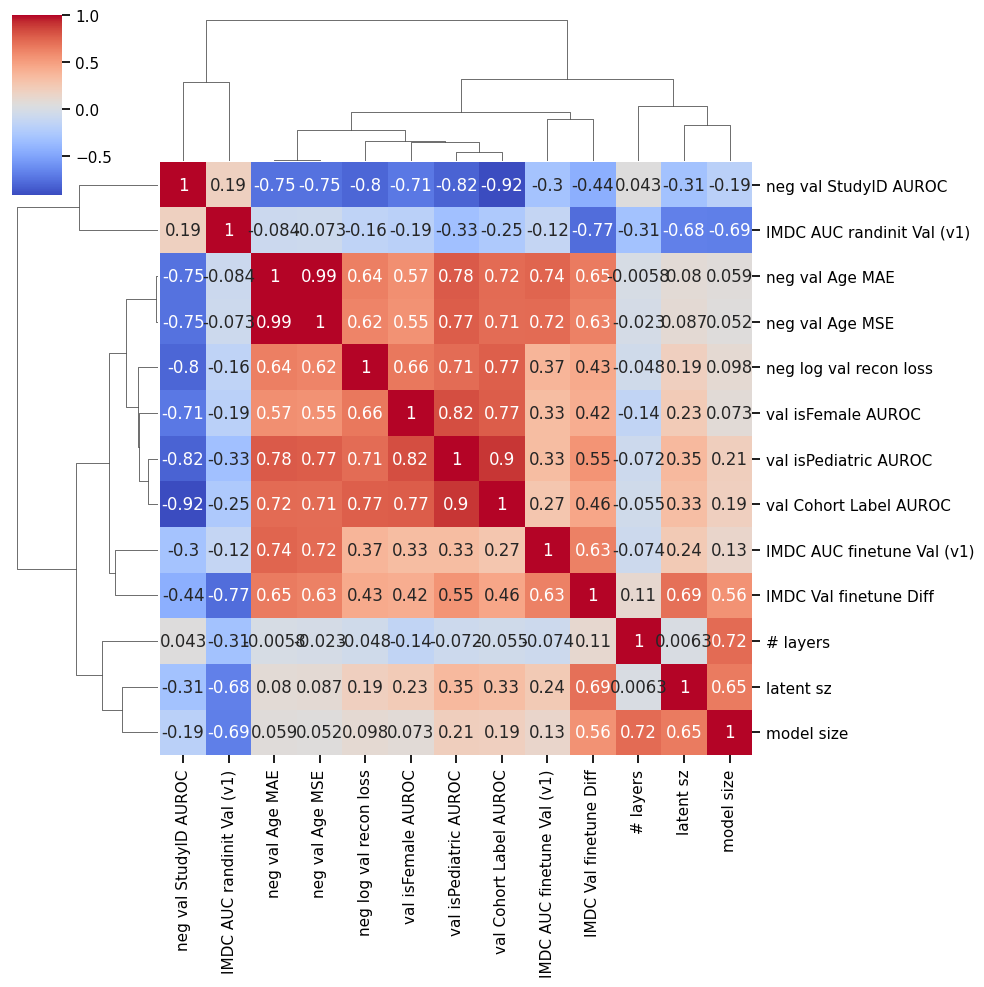

In [35]:
sns.set_context('notebook')
plt.figure(figsize=(22, 18))
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True)
plt.xticks(rotation=45, ha='right')


<Figure size 2200x1800 with 0 Axes>

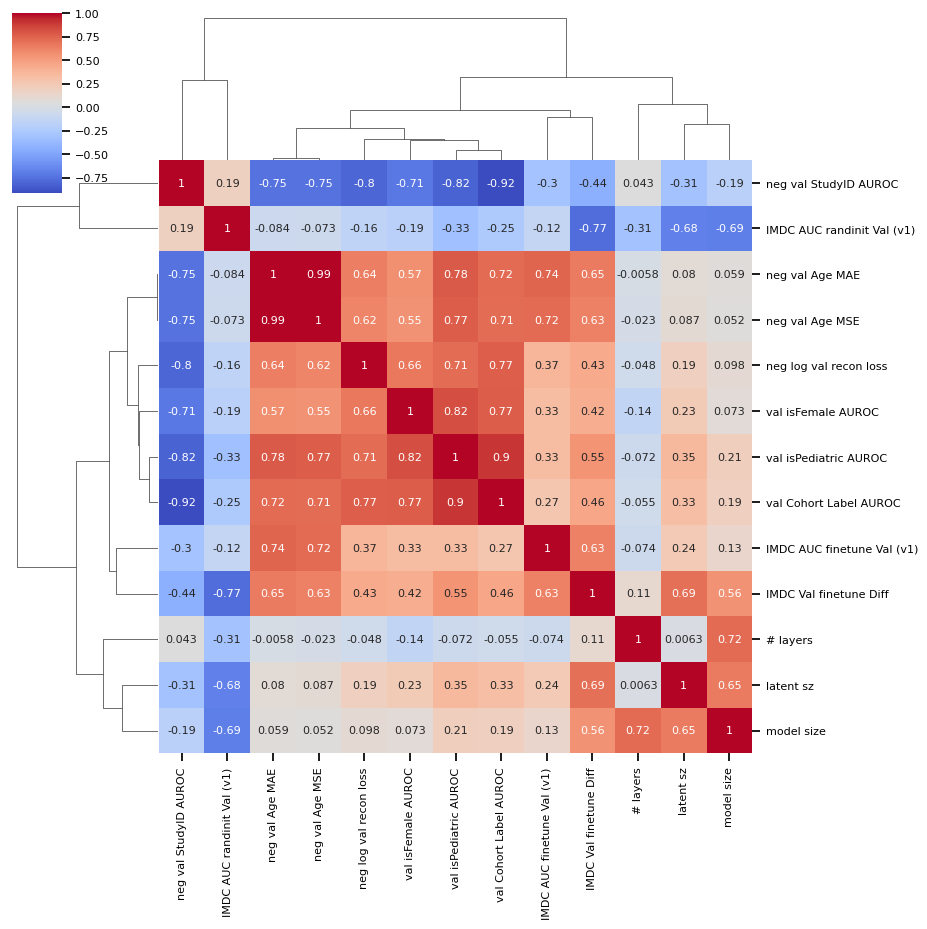

In [41]:
sns.set_context('notebook')
plt.figure(figsize=(22, 18))
cax = sns.clustermap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')

# Set colorbar label size
cax.cax.yaxis.set_tick_params(labelsize=8)

# Set colorbar label size
cax.cax.yaxis.set_tick_params(labelsize=8)

# Set axis label size
cax.ax_heatmap.tick_params(axis='both', which='both', labelsize=8)
# cax.ax_heatmap.tick_params(axis='both', which='both', rotation=45, ha='right')


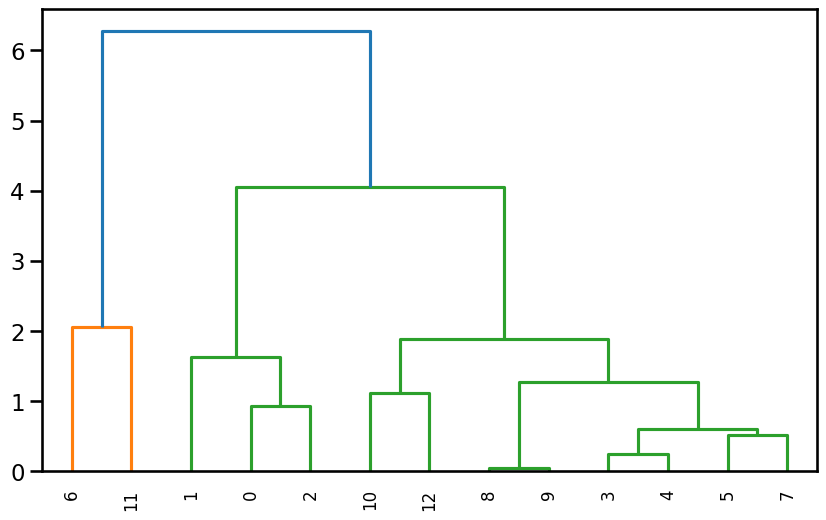

In [25]:
import scipy.cluster.hierarchy as sch

# Compute the linkage matrix
Z = sch.linkage(corr_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(Z)

# Add labels to the x-axis
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [76]:
df[pretrain_val_cols+pretrain_age_cols].corr(method='pearson').round(3).to_csv('/Users/jonaheaton/Desktop/pretrain corr pearson.csv')

In [78]:
df[pretrain_val_cols+pretrain_age_cols+finetune_cols].corr(method='spearman').round(3).to_csv('/Users/jonaheaton/Desktop/pretrain and finetune corr spearman.csv')
df[pretrain_val_cols+pretrain_age_cols+finetune_cols].corr(method='pearson').round(3).to_csv('/Users/jonaheaton/Desktop/pretrain and finetune corr pearson.csv')

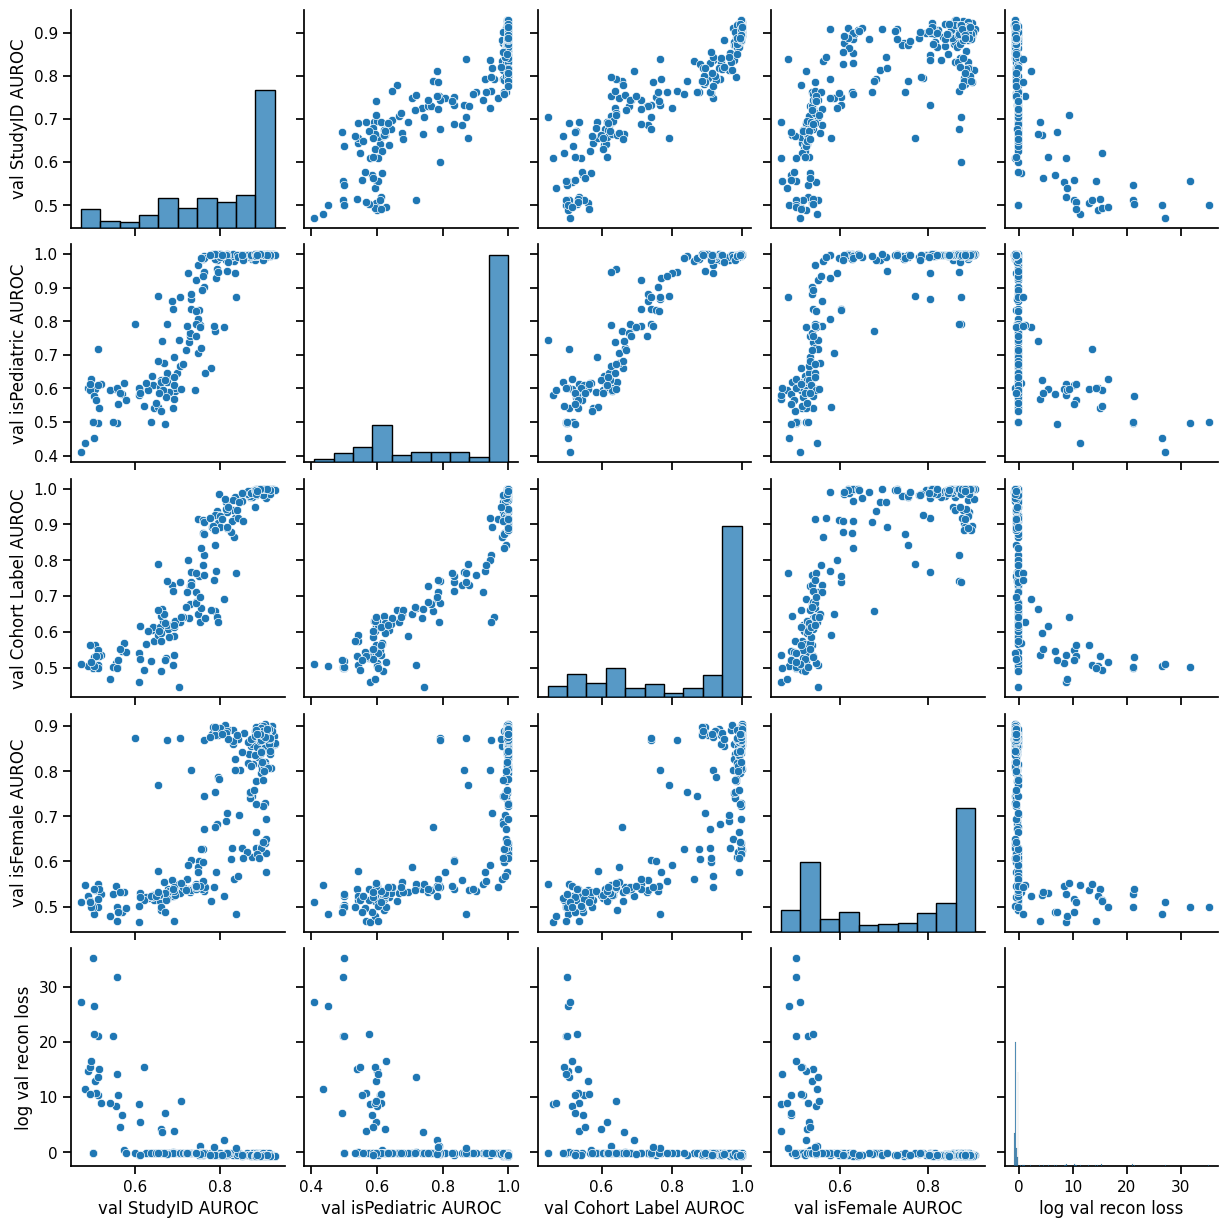

In [37]:
sns.set_context('notebook')
sns.pairplot(df[pretrain_val_cols])

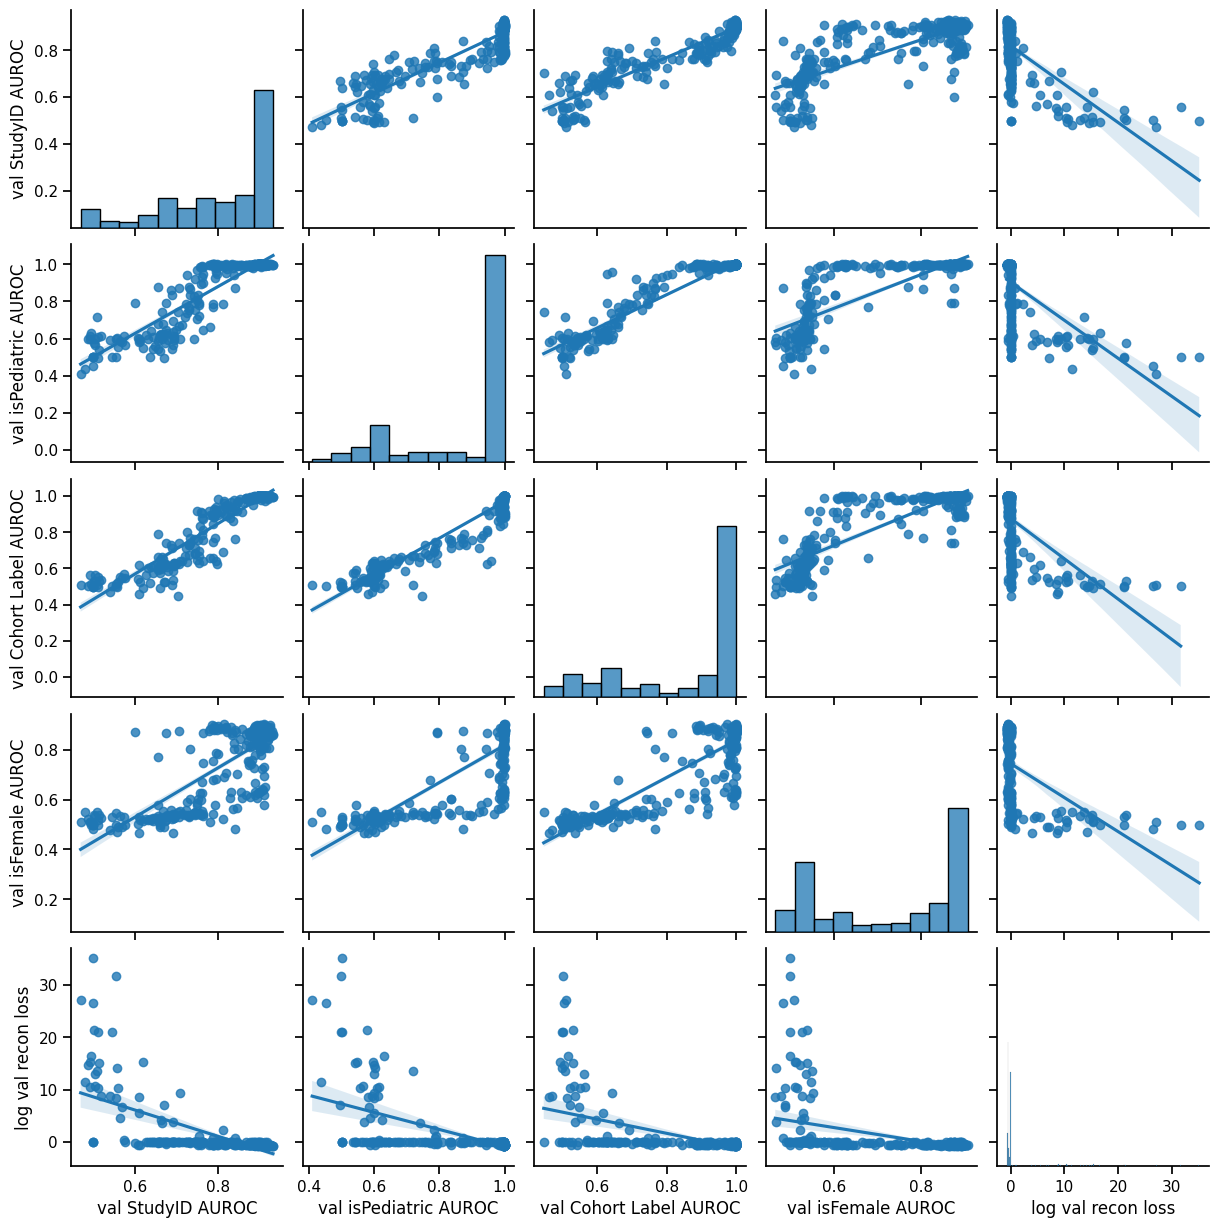

In [38]:
# add correlations to the pairplot
sns.pairplot(df[pretrain_val_cols],kind='reg',plot_kws={'line_kws':{'color':'red'}})
# 

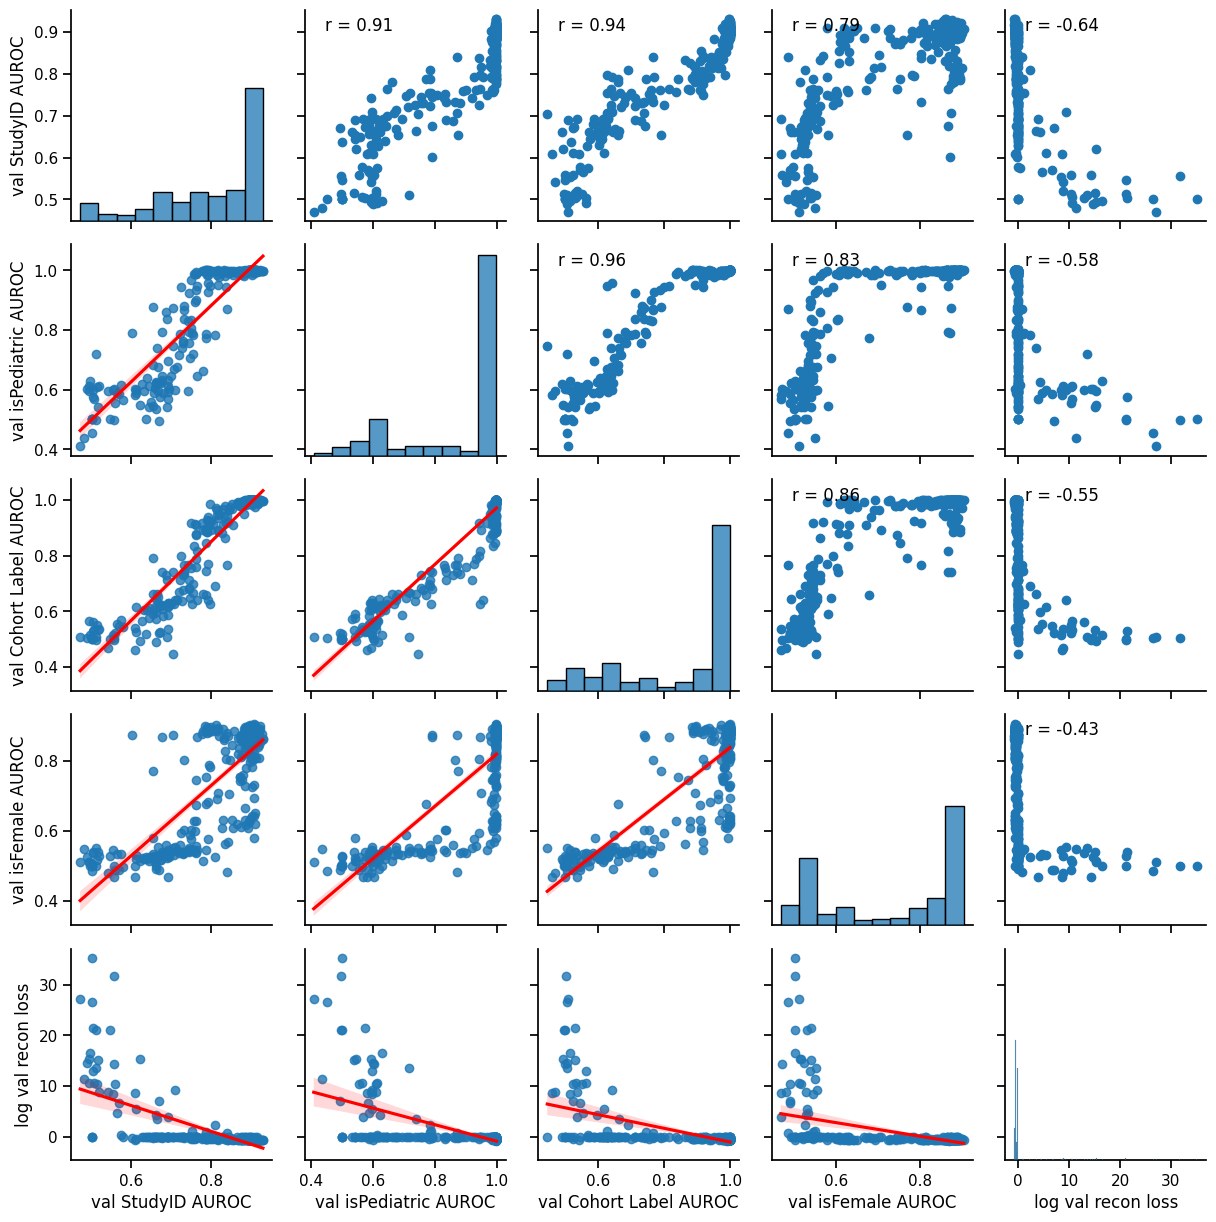

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define a function to calculate and annotate the correlation coefficient
import numpy as np

# Define a function to calculate and annotate the correlation coefficient
def corrfunc(x, y, **kws):
    # Ignore nan values
    mask = np.logical_not(np.isnan(x)) & np.logical_not(np.isnan(y))


    r, _ = stats.pearsonr(x[mask], y[mask])
    ax = plt.gca()
    ax.annotate(f'coef = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    # add the R2 
    

# Create a PairGrid
g = sns.PairGrid(df[pretrain_val_cols])

# Map the plots to the PairGrid
g = g.map_upper(plt.scatter)
g = g.map_upper(corrfunc)
g = g.map_lower(sns.regplot, line_kws={'color':'red'})
g = g.map_diag(sns.histplot)